# Генерация распределений

Генерация распределений, расчет функции распределения, плотности распределения

In [2]:
from scipy import stats
import numpy as np

__Нормальное распределение__

In [16]:
from scipy.stats import norm

- Генерация вектора нормально распредленных случайных величин

In [34]:
norm_sample = norm.rvs(loc=0, scale=1, size=10) # loc - мат ожидание, scale = стандартное отклонение (корень из дипсерсии)
norm_sample

array([-0.86492856, -0.57469889,  0.75715642, -1.47215999, -0.99962672,
        0.19739793, -1.5678354 , -1.67081776, -0.93605969,  2.12860366])

- Плотность распределения в конкретной точке

In [35]:
norm_rv = norm(loc=0, scale=1) #задаем генератор
norm_rv.pdf(1) # вычисляем плотность

0.24197072451914337

- Функция распределения в конкретной точке

In [37]:
norm_rv = norm(loc=0, scale=1)
norm_rv.cdf(1)

0.8413447460685429

In [38]:
norm.cdf(1, loc=0, scale=1)

0.8413447460685429

- Среднее распределения

In [39]:
norm.mean(loc=0, scale=1)

0.0

In [42]:
norm.mean(loc=2, scale=1)

2.0

- Стандартное отклонение

In [40]:
norm.std(loc=0, scale=9)

9.0

- Дисперсия

In [41]:
norm.var(loc=0, scale=9)

81.0

- Картинки

In [ ]:
# задаем решетку - через linspace генерируем массив значений - в диапазоне от Х до Y генерируем Z значений
x = np.linspace(-3,3,100)
# для каждого элемента в этом диапазоне рассчитываем плотности
norm_rv = norm(loc=0, scale=1)
pdf = norm_rv.pdf(x)

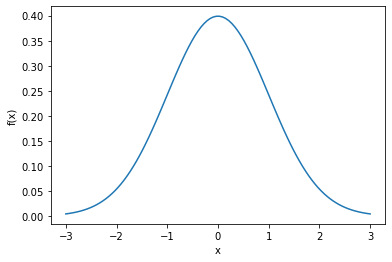

In [46]:
# строим график через matplotlib
import matplotlib.pyplot as plt
plt.plot(x, pdf) # x - то, что будет по оси Ох, pdf - то, что будет по оси Оy
plt.ylabel('f(x)')
plt.xlabel('x');

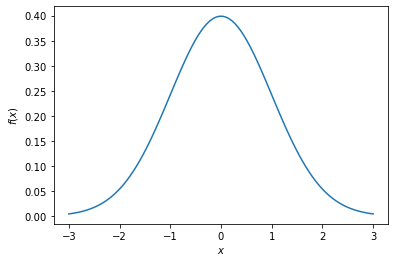

In [47]:
plt.plot(x, pdf) # x - то, что будет по оси Ох, pdf - то, что будет по оси Оy
plt.ylabel('$f(x)$') # если в долларах, то включается математич. режим формул, немного иной шрифт у названия осей
plt.xlabel('$x$');

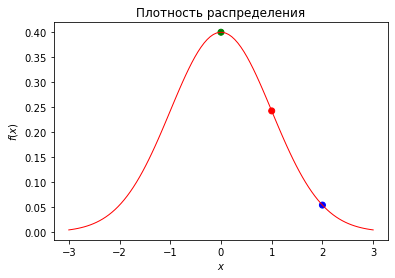

In [72]:
# отметим на этом рисунке точки (значения плотности в конкретной точке)
plt.plot(x, pdf, c='red', linewidth=1) # x - то, что будет по оси Ох, pdf - то, что будет по оси Оy
plt.title('Плотность распределения', fontsize=12)
plt.ylabel('$f(x)$') # если в долларах, то включается математич. режим формул, немного иной шрифт у названия осей
plt.xlabel('$x$');
plt.scatter([0,1,2], [norm_rv.pdf(0), norm_rv.pdf(1), norm_rv.pdf(2)], c=['green', 'red', 'blue']);
# здесь координаты х - это 0,1,2, координаты y - это значение плотности в указанных иксах

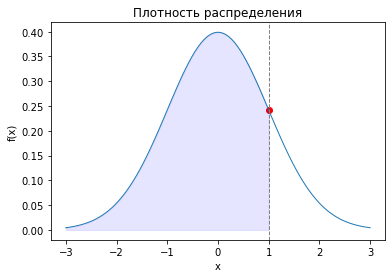

In [89]:
# отметим цветом и штриховкой определенную вероятностную массу до конкретной точки

x = np.linspace(-3,3,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, lw=1) # lw - толщина
plt.title('Плотность распределения', fontsize=12)
plt.ylabel('f(x)')
plt.xlabel('x')

plt.scatter(1, norm_rv.pdf(1), c='red');

# новая часть - новый график, наслаиваемый
xq = np.linspace(-3,1,100) # строим пространство до того знаечния, в котором нужно провести границу
yq = norm_rv.pdf(xq) # находим плотность во всех точках пространства
# новый тип графика - с заливкой
plt.fill_between(xq, 0, yq, color='blue', alpha=0.1); # alpha - степень прозрачности
# xq - координаты по оси x, 0 - до какого момента делать заливку по игрику, yq - координаты по оси y

# рисуем трихованную линию - вертикальную, первый аргумен = x, остальные опционально границы игрика
plt.axvline(1, color='gray', linestyle='--', lw=1); # lw - толщина

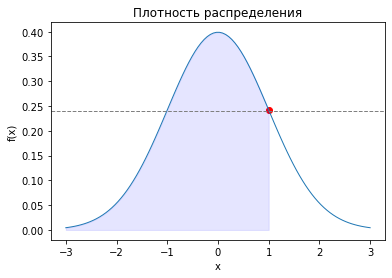

In [101]:
x = np.linspace(-3,3,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, lw=1) 
plt.title('Плотность распределения', fontsize=12)
plt.ylabel('f(x)')
plt.xlabel('x')
plt.scatter(1, norm_rv.pdf(1), c='red');
xq = np.linspace(-3,1,100) 
yq = norm_rv.pdf(xq) 
plt.fill_between(xq, 0, yq, color='blue', alpha=0.1); 


# рисуем трихованную линию - задаем координаты начала (x1, y1) и конца (x,y), slope - наклон
plt.axline([-3,0.24], [3,0.24], slope=None, color='gray', linestyle='--', lw=1); 

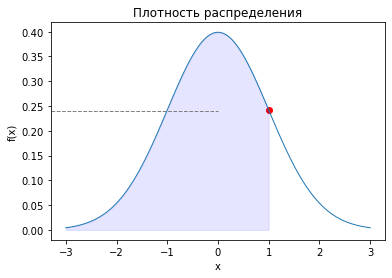

In [113]:
x = np.linspace(-3,3,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, lw=1) 
plt.title('Плотность распределения', fontsize=12)
plt.ylabel('f(x)')
plt.xlabel('x')
plt.scatter(1, norm_rv.pdf(1), c='red');
xq = np.linspace(-3,1,100) 
yq = norm_rv.pdf(xq) 
plt.fill_between(xq, 0, yq, color='blue', alpha=0.1); 


# рисуем трихованную линию - горизонтальную, первый аргумент - y, остальные опицонально (от нуля до единицы) границы иксов
plt.axhline(0.24, 0, 0.5, color='gray', linestyle='--', lw=1); 

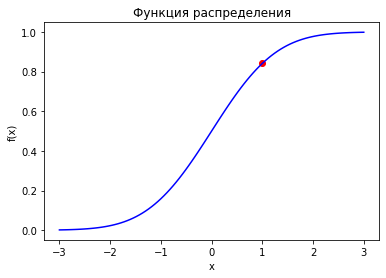

In [117]:
# Функция распределения

x = np.linspace(-3,3,100)
cdf = norm_rv.cdf(x)

plt.plot(x, cdf, c='blue')
plt.title('Функция распределения', fontsize=12)
plt.ylabel('f(x)')
plt.xlabel('x');

# на ней же нарисуем функцию распрделения в точке 1
plt.scatter([1], [norm_rv.cdf(1)], c='red');

0.15730535589982697


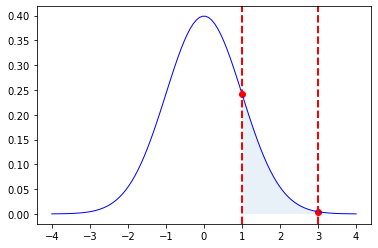

In [122]:
# Найдем вероятность, что 1<=x<=3

print(norm_rv.cdf(3)-norm_rv.cdf(1))

norm_rv = norm(loc=0, scale=1)
x = np.linspace(-4,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, c='blue', lw=1)

xq = np.linspace(1,3,100)
yq = norm_rv.pdf(xq)
plt.fill_between(xq, 0, yq, alpha=0.1)

plt.scatter([1, 3], [norm_rv.pdf(1), norm_rv.pdf(3)], c='red')

plt.axvline(1, c='red', linestyle='--', lw=2)
plt.axvline(3, c='red', linestyle='--', lw=2);

- Квантиль - величина, вероятность попадания левее которой равна указанному знаечнию гамма

In [123]:
# в какой величине я окажусь с вероятностью 0,05?
norm_rv = norm(loc=0, scale=1)
q = norm_rv.ppf(0.05)
q

-1.6448536269514729

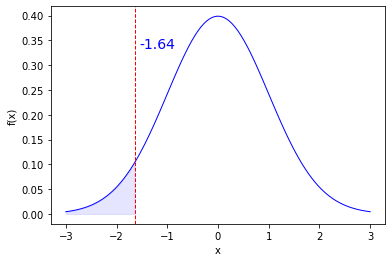

In [132]:
# картинка

q = norm_rv.ppf(0.05)

x = np.linspace(-3, 3, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, c='blue', lw=1)
plt.xlabel('x')
plt.ylabel('f(x)')

xq = np.linspace(-3, q)
yq = norm_rv.pdf(xq)
plt.fill_between(xq, 0, yq, color='blue', alpha=0.1)
plt.axvline(q, color = 'red', linestyle='--', lw=1)

# подпишем цифру
y_max = plt.ylim()[1] # макс значение оси игрика
plt.text(q+0.1, 0.8*y_max, round(q, 2), color='blue', fontsize=14);
# задаем положение текста на координатной оси: координа текста по оси икс - это чуть правее нашего квантиля
# по игрику - примерно на 80% по длине оси (выше середины)
# потом третий аргумент - это знаечние квантиля (тут округленное через round до второго знака после запятой)

- Эмпирическое распределение

In [134]:
norm_rv = norm(loc=0, scale=1)
sample = norm_rv.rvs(1000)
sample[:10]

array([ 0.07407805, -1.21154347,  1.58695096,  1.49559072,  0.44836713,
       -0.51205487,  0.31314684, -0.84554718,  2.35504259,  0.64535478])

In [135]:
# размерность 
sample.shape

(1000,)

In [136]:
# среднее
np.mean(sample)

0.04003421940898236

In [137]:
# дисперсия
np.var(sample)

1.0520915192844535

In [138]:
# стандартное отклонение
np.std(sample)

1.0257151257949029

In [140]:
# медиана
np.median(sample)

0.07212119657123146

(array([ 1.,  2.,  2.,  0.,  0.,  0.,  3.,  1.,  5.,  6.,  7.,  6., 21.,
        19., 23., 24., 25., 26., 47., 41., 52., 43., 51., 51., 44., 57.,
        58., 55., 51., 52., 31., 41., 25., 20., 29., 19., 24.,  4.,  8.,
         6.,  4.,  3.,  4.,  3.,  2.,  2.,  0.,  0.,  0.,  2.]),
 array([-3.40436052, -3.26527909, -3.12619765, -2.98711622, -2.84803479,
        -2.70895335, -2.56987192, -2.43079048, -2.29170905, -2.15262761,
        -2.01354618, -1.87446474, -1.73538331, -1.59630187, -1.45722044,
        -1.318139  , -1.17905757, -1.03997613, -0.9008947 , -0.76181327,
        -0.62273183, -0.4836504 , -0.34456896, -0.20548753, -0.06640609,
         0.07267534,  0.21175678,  0.35083821,  0.48991965,  0.62900108,
         0.76808252,  0.90716395,  1.04624539,  1.18532682,  1.32440825,
         1.46348969,  1.60257112,  1.74165256,  1.88073399,  2.01981543,
         2.15889686,  2.2979783 ,  2.43705973,  2.57614117,  2.7152226 ,
         2.85430404,  2.99338547,  3.13246691,  3.27154834,

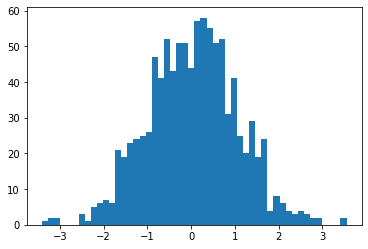

In [144]:
# гистограмма
plt.hist(sample, bins=50)

(array([  5.,  15.,  76., 163., 241., 273., 146.,  61.,  16.,   4.]),
 array([-3.40436052, -2.70895335, -2.01354618, -1.318139  , -0.62273183,
         0.07267534,  0.76808252,  1.46348969,  2.15889686,  2.85430404,
         3.54971121]),
 <BarContainer object of 10 artists>)

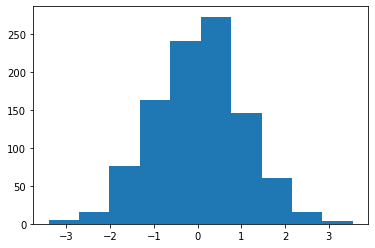

In [143]:
plt.hist(sample)

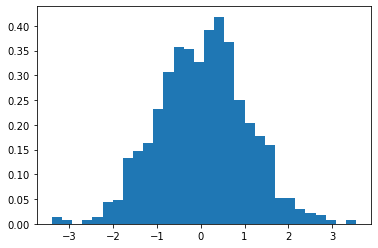

In [145]:
# отнормируем гистограмму так, чтобы суммарно площадь под всеми бинами давала единицу (параметр density=True)
plt.hist(sample, bins=30, density=True);

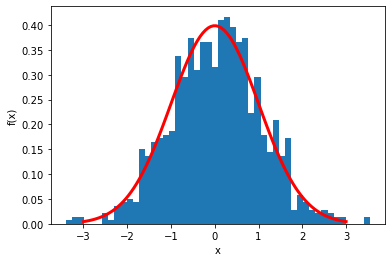

In [148]:
# нарисуем на той же гистограмме плотность распределения

x = np.linspace(-3,3,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, c='red', lw=3)

plt.hist(sample, bins=50, density=True)
plt.ylabel('f(x)')
plt.xlabel('x');

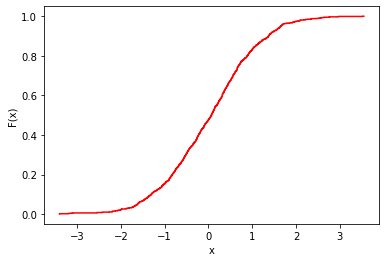

In [157]:
# эмпирическая функция рапсределения (ECDF)

from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample) # эмпирическая функция по нашей выборке 
# ecdf.x - Значения по оси икс (координаты), ecdf.y - значения по оси y (значения эмпирической функции в массиве (x,y))

# строим ступенчатый график
plt.step(ecdf.x, ecdf.y, c='red') # обращаемся к значениям икса и к значениям игрика в качестве координат
plt.ylabel('F(x)')
plt.xlabel('x');

In [158]:
ecdf = ECDF(sample) # эмпирическая функция по нашей выборке
ecdf.x 

array([       -inf, -3.40436052, -3.21194693, ...,  2.97503316,
        3.52437473,  3.54971121])

In [159]:
ecdf.y

array([0.   , 0.001, 0.002, ..., 0.998, 0.999, 1.   ])

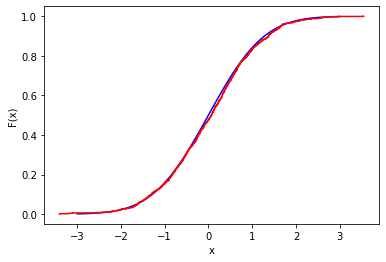

In [160]:
# построим поверх нее теоретическую фукцию распределения

xq = np.linspace(-3,3,100)
cdf = norm_rv.cdf(xq)
plt.plot(xq, cdf, c='blue')

ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, c='red')
plt.ylabel('F(x)')
plt.xlabel('x');

__Распределение Бернулли__

In [161]:
from scipy.stats import bernoulli

In [170]:
p = 0.2
bern_rv = bernoulli(p)

In [173]:
cdf = bern_rv.cdf(1)
cdf

1.0

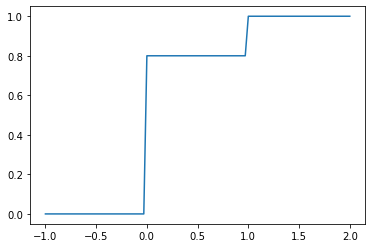

In [188]:
x = np.linspace(-1,2,100)
cdf = bern_rv.cdf(x)
plt.plot(x, cdf);

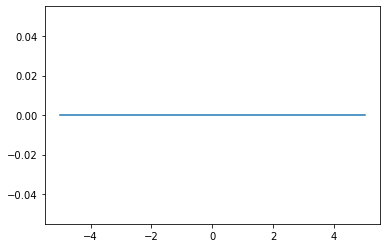

In [177]:
x = np.linspace(-5,5,100)
pmf = bern_rv.pmf(x)
plt.plot(x, pmf);

In [187]:
pmf = bern_rv.pmf(0)
pmf

0.8

In [189]:
sample = bernoulli.rvs(p=0.2, size=1000)
sample[:10]

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 1])

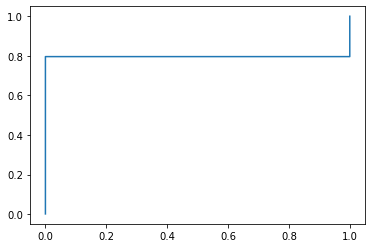

In [190]:
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y);

__Генерация выборок__

In [192]:
# Сгенерируем выборку из вектора 1:10 размера 5 без повторений, все элементы выбираются равновероятно

np.random.choice(np.arange(1,11), # диапазон, из которого выбираем от 1 до 11 (не включая 11)
                 size = 5, # количество значений в выборке
                 replace = False) # без повторений

array([1, 8, 5, 4, 7])

In [196]:
# Сгенерируем выборку из вектора 1:10 размера 5 с повторениями, все элементы выбираются равновероятно

np.random.choice(np.arange(1,11),
                size=5,
                replace=True)

array([9, 8, 1, 9, 5])

In [197]:
# Сгенерируем выборку из вектора рыб размера 10 с повторениями, все элементы выбираются с заданными вероятностями

np.random.choice(['карась', 'плотва', 'щука'],
                size=10,
                p=[0.5, 0.2, 0.3])

array(['карась', 'щука', 'карась', 'щука', 'карась', 'карась', 'щука',
       'щука', 'щука', 'плотва'], dtype='<U6')

__Зёрная генерация__

- Используется, чтобы зафикисровать конкретную случайную генерацию

In [198]:
stats.norm(loc=3, scale=2).rvs(5)

array([8.29315282, 2.09281688, 0.91581404, 3.03616769, 1.07660463])

In [199]:
stats.norm(loc=3, scale=2).rvs(5)

array([8.14592826, 5.99301894, 2.95419285, 0.94898206, 3.81532559])

In [200]:
stats.norm(loc=3, scale=2).rvs(5)

array([ 3.16307106,  4.65796117, -0.49265123,  3.28437029,  6.30376405])

In [201]:
# каждый раз генерируется новая случайность

Генерирование случайных величин никак не противоречит идее абсолютно точной воспроизводимости исследований. Для того, чтобы получились одинаковые результаты, необходимо синхронизировать генераторы случайных чисел на двух компьютерах. Делается это путём задания зерна генератора случайных чисел (seed). Зерно также называют стартовым значением. В качестве зерна подойдет любое целое число. 

In [202]:
stats.norm(loc=3, scale=2).rvs(5, random_state=42)

array([3.99342831, 2.7234714 , 4.29537708, 6.04605971, 2.53169325])

In [203]:
stats.norm(loc=3, scale=2).rvs(5, random_state=42)

array([3.99342831, 2.7234714 , 4.29537708, 6.04605971, 2.53169325])

In [204]:
# каждый раз одинаковые значения

In [206]:
import random
random.random()

0.7704595922860656

In [207]:
random.random()

0.5964887911277109

In [208]:
random.seed(444)
random.random()

0.3088946587429545

In [210]:
random.seed(444)
random.random()

0.3088946587429545

# Упражнения

Задайте генератор для случайной величины имеющей нормальное распределение: $X \sim N(4, 10^2)$. 

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

In [3]:
norm_rv = sts.norm(4, 10)

Найдите вероятности $P(X > 4)$, $P(X \in [2; 20])$, $P(X < −5)$. Запишите их в переменные `p1, p2, p3`. 

In [11]:
p1 = 1 - norm_rv.cdf(4)
p2 = norm_rv.cdf(20) - norm_rv.cdf(2)
p3 = norm_rv.cdf(-5)
p1, p2, p3

(0.5, 0.5244604177395451, 0.18406012534675947)

Найдите число $a$ такое, что $P(X > a) = 0.3$.

In [12]:
a = norm_rv.ppf(0.7)
a

9.244005127080406

Сгенерируйте выборку размера $100$. Постройте по этой выборке гистограмму. На том же рисунке изобразите плотность распределения нормальной случайной величины. 

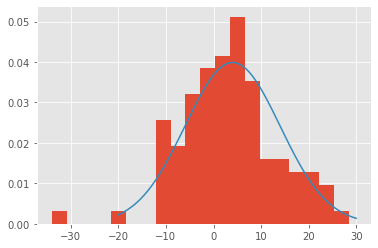

In [6]:
x = norm_rv.rvs(100)
plt.hist(x, density=True, bins=20)
xs = np.linspace(-20, 30, 300)
ys = norm_rv.pdf(xs)
plt.plot(xs, ys);

Оцените эмпирическую функцию распределения. Изобразите её и теоретическую функцию распределения на графике. 

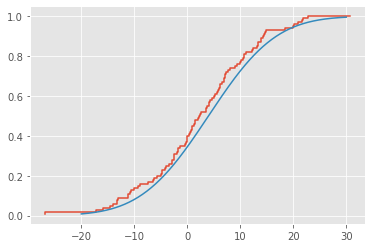

In [7]:
from statsmodels.distributions.empirical_distribution import ECDF
x = norm_rv.rvs(100)
ecdf = ECDF(x)
plt.step(ecdf.x, ecdf.y, label='empirical CDF')
ys = norm_rv.cdf(xs)
plt.plot(xs, ys);


Пусть количество писем со спамом, которое пришло к нам на почту, имеет распределение Пуассона. Предположим, что вы получаете в среднем три спам-письма в день. Какова доля дней, в которые вы получаете пять или больше спам-писем?

In [9]:
p = 1 - sts.poisson(3).cdf(4)
p

0.1847367554762278

Во время ЧЕ по футболу 2008 года и ЧМ 2010 года Осьминог Пауль занимался прогнозированием побед (после он ушёл в финансовую аналитику и IB). Осьминог дал верные прогнозы в 12 случаях из 14. Если предположить, что Пауль выбирает победителя наугад, какова вероятность получить 12 верных прогнозов из 14?

In [13]:
p = sts.binom(14, 0.5).pmf(12)
p

0.005554199218750009

Если предположить, что Осьминог правильно выбирает победителя с вероятностью $0.9$, какова вероятность получить тот же результат? 

In [14]:
p = sts.binom(14, 0.9).pmf(12)
p

0.25701087819770996